In [6]:
import requests
import json
from pprint import pprint
from RiotRequest import RiotRequest

api_key = "RGAPI-e9082b86-f6ce-41ba-860a-c962eb529056"

def get_account_id(summoner_name):

    json_data = RiotRequest("https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{0}?api_key={1}".format(summoner_name, api_key))

#    print(json_data)

    return json_data['accountId']

def get_timeline(match_id):
    json_data = RiotRequest("https://kr.api.riotgames.com/lol/match/v4/timelines/by-match/{0}?api_key={1}".format(match_id, api_key))
    
    return json_data

def get_match_history(account_id):

    json_data = RiotRequest("https://kr.api.riotgames.com/lol/match/v4/matchlists/by-account/{0}?api_key={1}".format(account_id, api_key))

#   pprint(json_data['matches'])

    game_id_list = [match['gameId'] for match in json_data['matches']]

    return game_id_list


def get_game_detail(game_id):

    json_data = RiotRequest("https://kr.api.riotgames.com//lol/match/v4/matches/{0}?api_key={1}".format(game_id, api_key))

#    pprint(json_data['participants'])

    return json_data

def get_champion_json():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.8.1/data/ko_KR/champion.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    champions_info = list(json_data.values())[3]
    champions_list = list(champions_info.values())
    champion_dict={}
    for champion in champions_list:
        champion_dict[champion['key']] = champion['id']
    
    return champion_dict

def get_item_json():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.8.1/data/ko_KR/item.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    pprint(json_data['data'])
    
    return json_data['data']

def get_profile_icons_json(): 
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.8.1/data/ko_KR/profileicon.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    pprint(json_data['data'])
    
    return json_data['data']
    
def get_individual_champions(champion):
    #modified by Sunny
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.8.1/data/ko_KR/champion/%s.json" % champion)
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    #pprint(json_data['data'])
    
    return json_data['data'][champion]

def get_masteries():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.8.1/data/ko_KR/mastery.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    pprint(json_data['data'])
    
    return json_data['data']

def get_runes():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.8.1/data/en_US/rune.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    pprint(json_data['data'])
    
    return json_data['data']

def get_summoner_spells():
    
    api_data = requests.get("http://ddragon.leagueoflegends.com/cdn/9.8.1/data/ko_KR/summoner.json")
    
    json_data = json.loads(api_data.content.decode("utf-8"))
    
    pprint(json_data['data'])
    
    return json_data['data']
    
champ_dict= get_champion_json()

SyntaxError: invalid syntax (RiotRequest.py, line 7)

In [2]:
#원본
get_individual_champions('Aatrox')['spells'][1]['tooltip']

'아트록스가 지면을 내리쳐 처음 맞힌 적에게 <physicalDamage>{{ wdamage }}의 물리 피해</physicalDamage> 를 주고 {{ wslowduration }}초 동안 {{ wslowpercentage*-100 }}%만큼 둔화시킵니다.<br /><br />대상이 챔피언 또는 대형 몬스터인 경우 {{ wslowduration }}초 안에 해당 지역을 벗어나지 않으면 다시 끌려가 피해를 받습니다.'

In [3]:
import re
clean = re.compile('<.*?>')
text = re.sub(clean, '', get_individual_champions('Aatrox')['spells'][1]['tooltip'])
print(text)

아트록스가 지면을 내리쳐 처음 맞힌 적에게 {{ wdamage }}의 물리 피해 를 주고 {{ wslowduration }}초 동안 {{ wslowpercentage*-100 }}%만큼 둔화시킵니다.대상이 챔피언 또는 대형 몬스터인 경우 {{ wslowduration }}초 안에 해당 지역을 벗어나지 않으면 다시 끌려가 피해를 받습니다.


In [4]:
#한글 텍스트 제외 전부 제거
import re
clean = re.compile('<.*?>')
text = re.sub(clean, '', get_individual_champions('Aatrox')['spells'][1]['tooltip'])
text = re.sub('[-{}0-9*%a-zA-Z]', '', text)
print(text)

아트록스가 지면을 내리쳐 처음 맞힌 적에게   의 물리 피해 를 주고   초 동안   만큼 둔화시킵니다.대상이 챔피언 또는 대형 몬스터인 경우   초 안에 해당 지역을 벗어나지 않으면 다시 끌려가 피해를 받습니다.


In [37]:
import re
champ_dict= get_champion_json()
clean = re.compile('<.*?>')

skillLen= []  #List of Champions with each skill's description lengths
for i in champ_dict:
    champskill = []  #individual rows of champions and skill descriptions
    champskill.append(len(get_individual_champions(champ_dict[i])['passive']['description']))
    for j in range(4):
        champskill.append(len(get_individual_champions(champ_dict[i])['spells'][j]['tooltip']))
    sum = 0
    for k in range(0,5):
        sum = sum + champskill[k]
    champskill.append(sum)
    champskill.append(get_individual_champions(champ_dict[i])['info']['difficulty'])
    skillLen.append(champskill)

skillLen2= []    #List of Champions with each skill's description lengths
for i in champ_dict:
    champskill2 = []  #individual rows of champions and skill descriptions
    passnlp = re.sub(clean, '', get_individual_champions(champ_dict[i])['passive']['description'])
    champskill2.append(len(passnlp))
    for j in range(4):
        skillnlp = re.sub(clean, '', get_individual_champions(champ_dict[i])['spells'][j]['tooltip'])
        champskill2.append(len(skillnlp))
    sum = 0
    for k in range(0,5):
        sum = sum + champskill2[k]
    champskill2.append(sum)
    champskill2.append(get_individual_champions(champ_dict[i])['info']['difficulty'])
    skillLen2.append(champskill2)
    
skillLen3= []  #List of Champions with each skill's description lengths
for i in champ_dict:
    champskill3 = []  #individual rows of champions and skill descriptions
    passnlp = re.sub(clean, '', get_individual_champions(champ_dict[i])['passive']['description'])
    champskill3.append(len(passnlp))
    for j in range(4):
        skillnlp = re.sub(clean, '', get_individual_champions(champ_dict[i])['spells'][j]['tooltip'])
        skillnlp = re.sub('[-{}0-9*%a-zA-Z]', '', skillnlp)
        champskill3.append(len(skillnlp))
    sum = 0
    for k in range(0,5):
        sum = sum + champskill3[k]
    champskill3.append(sum)
    champskill3.append(get_individual_champions(champ_dict[i])['info']['difficulty'])
    skillLen3.append(champskill3)

In [21]:
champlist = [champ_dict[i] for i in champ_dict]
champlist

['Aatrox',
 'Ahri',
 'Akali',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Ashe',
 'AurelionSol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 'Chogath',
 'Corki',
 'Darius',
 'Diana',
 'Draven',
 'DrMundo',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'Fiddlesticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'JarvanIV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 'Kaisa',
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 'Khazix',
 'Kindred',
 'Kled',
 'KogMaw',
 'Leblanc',
 'LeeSin',
 'Leona',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'MasterYi',
 'MissFortune',
 'MonkeyKing',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'Nunu',
 'Olaf',
 'Orianna',
 'Ornn',
 'Pantheon',
 'Poppy',
 'Pyke',
 'Quinn',
 'Raka

In [38]:
import pandas as pd
colname= ['passive','Q','W','E','R','Sum','Difficulty']

original = pd.DataFrame(skillLen, columns = colname, index= champlist) 
nlp1 = pd.DataFrame(skillLen2, columns = colname, index= champlist)   #html tag 제거 후 스킬 글자수
nlp2 = pd.DataFrame(skillLen3, columns = colname, index= champlist)   #한글 외 전부 제거 후 스킬 글자 수

In [39]:
original

,passive,Q,W,E,R,Sum,Difficulty
Aatrox,60,177,234,161,208,840,4
Ahri,44,319,302,176,185,1026,5
Akali,89,183,276,265,332,1145,7
Alistar,94,95,75,347,97,708,7
Amumu,95,126,184,429,128,962,3
Anivia,52,273,73,155,263,816,10
Annie,42,124,106,188,527,987,6
Ashe,101,350,170,178,160,959,4
AurelionSol,42,364,252,316,183,1157,7
Azir,40,270,839,283,266,1698,9


In [26]:
nlp1

,Q,W,E,R,Sum,Difficulty
Aatrox,132,189,93,184,598,4
Ahri,225,219,145,173,762,5
Akali,117,132,133,206,588,7
Alistar,76,56,225,97,454,7
Amumu,107,103,214,95,519,3
Anivia,211,73,124,191,599,10
Annie,91,73,143,338,645,6
Ashe,261,139,166,160,726,4
AurelionSol,224,124,228,113,689,7
Azir,140,500,167,183,990,9


In [27]:
nlp2

,Q,W,E,R,Sum,Difficulty
Aatrox,121,119,78,170,488,4
Ahri,172,194,114,100,580,5
Akali,91,109,107,131,438,7
Alistar,58,44,188,63,353,7
Amumu,89,84,182,61,416,3
Anivia,168,61,112,146,487,10
Annie,71,53,79,239,442,6
Ashe,224,124,159,126,633,4
AurelionSol,178,99,215,88,580,7
Azir,120,411,137,165,833,9


In [42]:
original.sort_values(by='Difficulty', ascending = False)

,passive,Q,W,E,R,Sum,Difficulty
Cassiopeia,47,248,273,330,151,1049,10
Anivia,52,273,73,155,263,816,10
Evelynn,81,533,442,480,214,1750,10
Rumble,157,202,207,195,237,998,10
Yasuo,83,364,34,274,365,1120,10
TwistedFate,62,77,545,155,152,991,9
Elise,96,122,124,53,276,671,9
Viktor,57,438,201,254,372,1322,9
Shaco,109,505,259,347,413,1633,9
Azir,40,270,839,283,266,1698,9


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

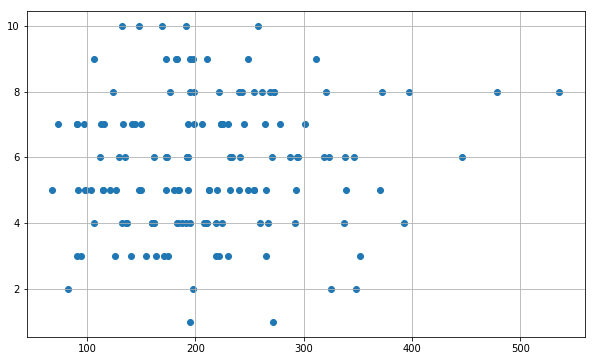

In [49]:
#각 dataframe의 각 칼럼마다 플롯 찍어봤지만 전혀 상관관계나 경향성을 찾을 수 없었음.... 뜨흡 ㅠㅠㅠ

plt.figure(figsize=(10,6))
plt.scatter(nlp1[''], nlp1['Difficulty'])
plt.grid()
plt.show()

In [7]:
#name of grandmaster
json_data = RiotRequest("https://kr.api.riotgames.com/lol/league/v4/grandmasterleagues/by-queue/{0}?api_key={1}".format(queue, api_key))
grand_sum = [i['summonerName'] for i in json_data['entries']]
print(grand_sum)

NameError: name 'RiotRequest' is not defined